<a href="https://colab.research.google.com/github/edologgerbird/deep-learning-project/blob/develop_edmund/Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Caption Generator: Comparing the performance between LSTM and Transformer based models

Project by: Loh Hong Tak Edmund (S221545), Sim Wee Yang (S221547), Woo Jun Hao Bryan (S221526)


### Background

Image caption generation is the process of a computer being able to recognize the context of an image and annotating it with the relevant captions. Recent developments in artificial intelligence and natural language processing allowed image caption generation to gain traction amongst researchers. The applications of image captioning are extensive, and there are various related methods that allow us to achieve this task. We intend to narrow our research down to LSTMs, transformers and the attention mechanism.

This project aims to compare the performance of an LSTM-based model with that of a transformer-based model on the task of image caption generation. The project will employ performance metrics BLEU (Bilingual Evaluation Understudy) Score and Rouge (Recall Oriented Understudy for Gisting Evaluation) to identify the best performing model (Dayal, 2022).

### Flickr8k

This project will explore Image Caption Generation using the Flickr8k dataset, which is a benchmark collection for sentence-based image description and search. This set contains 8,000 images that are each paired with five different captions which describes the entities and events within each respective picture.

### Setting Up Environment



Installing relevant modules

In [2]:
# Great Expectations
!pip install great_expectations --quiet

# YoloV5
!git clone https://github.com/ultralytics/yolov5  # clone
!pip install -r yolov5/requirements.txt --quiet

! pip install ipywidgets rich seaborn torch datasets transformers tokenizers sentencepiece sacremoses --quiet


     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 5.2 MB 29.4 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 439 kB 61.0 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 140 kB 74.5 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 793 kB 58.3 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 4.1 MB 61.0 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 109 kB 71.6 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 1.6 MB 68.4 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 9.8 MB 70.2 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ

Importing relevant modules

In [46]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rich
import random
from functools import partial

import great_expectations as ge

import glob
import os
from tqdm.notebook import tqdm
from collections import Counter
from typing import List, Tuple, Optional, Dict, Any
from pathlib import Path
from IPython.display import clear_output
from skimage.io import imread
from skimage.transform import resize


import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
from torch.nn import Linear, GRU, Conv2d, Dropout, MaxPool2d, BatchNorm1d
from torch.nn.functional import relu, elu, relu6, sigmoid, tanh, softmax
import torchvision
from torchvision import datasets, models, transforms
from torchsummary import summary                      #Line 5 

from PIL import Image 

import transformers
import tokenizers
import datasets
from datasets import Dataset
import zipfile
from huggingface_hub import hf_hub_download

# import data_utils

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [4]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
rich.print(f"Device: [red]{DEVICE}")

Device: cuda

In [5]:
# CONSTANTS

RANDOM_STATE = 42
TRAIN_SIZE = 0.80


Setting up Google Drive for development on Colab

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
drive_path = 'drive/My Drive/'

### Loading the data

We first start by loading the data, where we consolidate the image file names present in the data set. We also load the captions file, which contains the 5 captions tagged to their respective images.

In [8]:
image_paths = glob.glob(f'{drive_path}data/flickr_8k_dataset/Images/*.jpg')
print("Total Images:\t", len(image_paths))

captions = pd.read_csv(f'{drive_path}data/flickr_8k_dataset/captions.txt')
images = [f'{drive_path}data/flickr_8k_dataset/Images/{i}' for i in captions.image.values]

print(images[:3])
captions.head()

Total Images:	 8091
['drive/My Drive/data/flickr_8k_dataset/Images/1000268201_693b08cb0e.jpg', 'drive/My Drive/data/flickr_8k_dataset/Images/1000268201_693b08cb0e.jpg', 'drive/My Drive/data/flickr_8k_dataset/Images/1000268201_693b08cb0e.jpg']


image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   

                                             caption  
0  A child in a pink dress is climbing up a set o...  
1              A girl going into a wooden building .  
2   A little girl climbing into a wooden playhouse .  
3  A little girl climbing the stairs to her playh...  
4  A little girl in a pink dress going into a woo...

### Data Sanity Check

Next, we perform preliminary data sanity checks to ensure the cleanliness and validity of the data. We will make use of the great_expectations (GE) package to assist in these checks.

In summary, we will perform the following checks:

1. No null values
2. Caption data are of appropriate types
3. No images listed in the captions file that are missing in the images folder, vice versa
4. Each image contains exactly 5 accompanying captions

In [9]:
def check_expectations(df, column, expectation):
  ge_df = ge.from_pandas(df)
  ge_result = ge_df.expect_column_values_to_be_in_set(column, expectation)

  return {
    "Outcome: ": ge_result["success"],
    "Results: ": ge_result["result"]
    }

In [10]:
assert(set(captions["image"]) == set([i.split("/")[-1] for i in image_paths]))

In [11]:
check_expectations(captions, "image", [i.split("/")[-1] for i in image_paths])

{'Outcome: ': True,
 'Results: ': {'element_count': 40455,
  'missing_count': 0,
  'missing_percent': 0.0,
  'unexpected_count': 0,
  'unexpected_percent': 0.0,
  'unexpected_percent_total': 0.0,
  'unexpected_percent_nonmissing': 0.0,
  'partial_unexpected_list': []}}

In [12]:
caption_counts = captions.groupby("image").count()

check_expectations(caption_counts, "caption", [5])

{'Outcome: ': True,
 'Results: ': {'element_count': 8091,
  'missing_count': 0,
  'missing_percent': 0.0,
  'unexpected_count': 0,
  'unexpected_percent': 0.0,
  'unexpected_percent_total': 0.0,
  'unexpected_percent_nonmissing': 0.0,
  'partial_unexpected_list': []}}

Data passes sanity checks. There are no null and missing values, and the columns contain the expected image files names and the number of accomanying captions per image.

### Visualising the Data



First, we would like to visualise a few sample images.

In [13]:
def get_sample_image(image_paths, n):
  sample_images_path = random.sample(image_paths,n)
  sample_images_name = [i.split('/')[-1] for i in sample_images_path] 
  return sample_images_path, sample_images_name

def show_image(image_path):
  image = imread(image_path)
  plt.imshow(image)
  plt.axis('off')

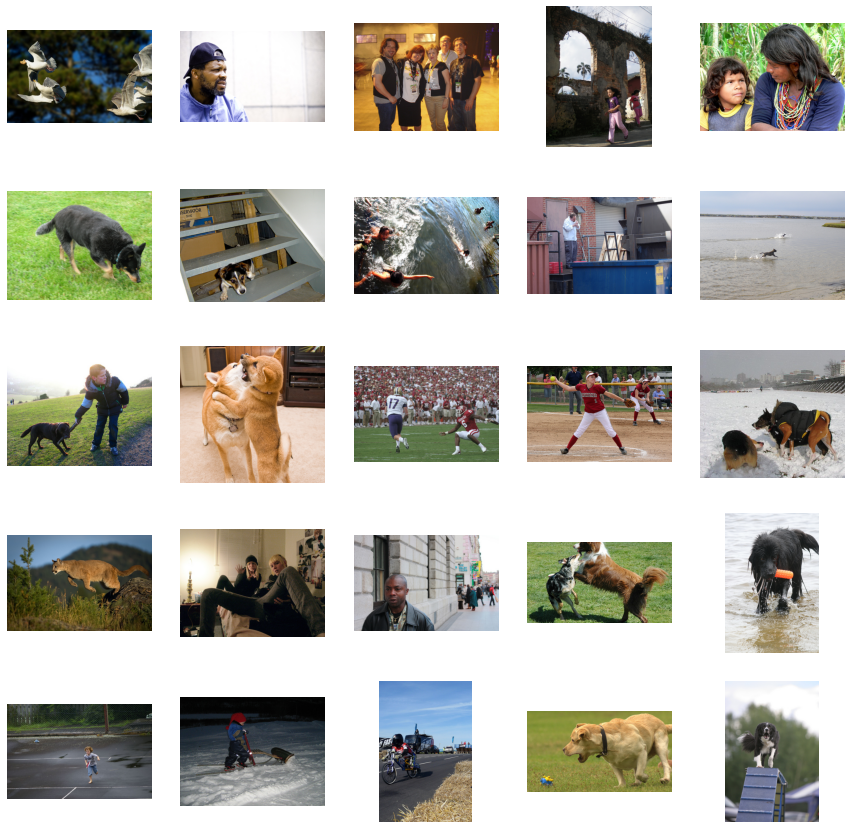

In [14]:
n_samples = 5*5
sample_images_path, sample_images_name = get_sample_image(image_paths,n_samples)

fig = plt.figure(figsize=(15, 15))

columns = 5
rows = 5

for i in range(len(sample_images_path)):
  image = imread(sample_images_path[i])
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(image)
  plt.axis('off')

Next, we would like to view a sample image and its accompanying captions.

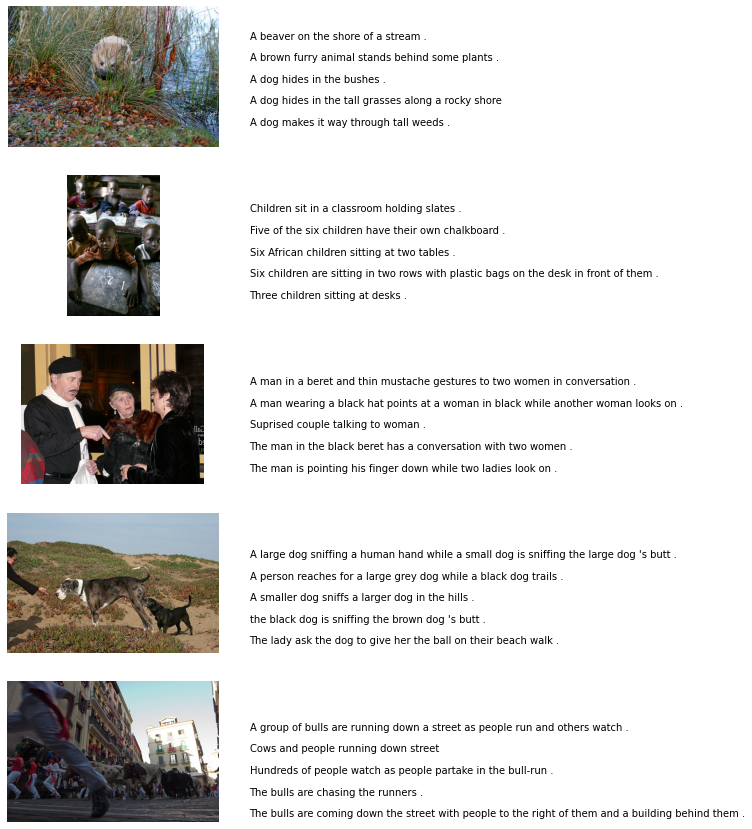

In [15]:
n_samples = 5
sample_images_path, sample_images_name = get_sample_image(image_paths,n_samples)

sample_images_captions = {i:captions[captions["image"] == i]["caption"].values for i in sample_images_name}

fig = plt.figure(figsize=(8, 15))

columns = 1
rows = 5

for i in range(len(sample_images_path)):
  image = imread(sample_images_path[i])
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(image)
  plt.axis('off')
  for enum, caption in enumerate(sample_images_captions[sample_images_name[i]]):
    plt.figtext(0.75,0.85+i*-0.16-0.02*enum, caption)

### Image Data Preparation

We first split the images into train and validation data. The same image should not be present in both training and validation data sets. To ensure this, we will split the training and test sets by unique image names.

In [16]:
unique_image_names = list(set(captions["image"].values))

random.seed(RANDOM_STATE)
train_image_names = random.sample(unique_image_names, int(len(unique_image_names)*TRAIN_SIZE))
test_image_names = [image for image in unique_image_names if image not in train_image_names]

train_captions = captions[captions['image'].isin(train_image_names)]
test_captions = captions[captions['image'].isin(test_image_names)]

print(f"Train Images: {len(train_image_names)}")
print(f"Test Images: {len(test_image_names)}")

print(f"Train Captions: {train_captions.shape[0]}")
print(f"Test Captions: {test_captions.shape[0]}")

Train Images: 6472
Test Images: 1619
Train Captions: 32360
Test Captions: 8095


### Image Feature Extraction

In this section, we will extract the features of each image using 2 pre-trained models:
1. YoloV5 for object detection and
2. VGG16 for object classification

#### Yolov5

In [17]:
yolov5_model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5n - yolov5x6, custom


  "You are about to download and run code from an untrusted repository. In a future release, this won't "

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 ðŸš€ 2022-11-7 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)



[Errno 2] No such file or directory: '/usr/local/lib/python3.7/dist-packages/urllib3-1.24.3.dist-info/METADATA'


  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


Demonstrating Yolov5 in object detection and classification

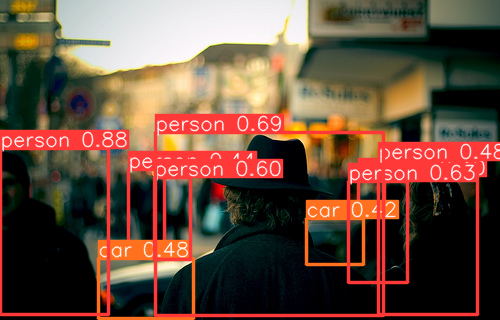

In [18]:
n_samples = 1
sample_images_path, sample_images_name = get_sample_image(image_paths,n_samples)
sample_image = sample_images_path[0]

sample_results = yolov5_model(sample_image)
sample_results.show()

In [19]:
def generate_yolov5_seed_text(results):
  return " ".join([f"{v} {k}" for k,v in dict(Counter(results.pandas().xyxy[0]['name'])).items()])

def yolov5_predict(image_path, convert_to_path = False):
  if convert_to_path:
    image_path = f"{drive_path}data/flickr_8k_dataset/Images/{image_path}"
  result = yolov5_model(image_path)
  return generate_yolov5_seed_text(result)

In [20]:
generate_yolov5_seed_text(sample_results)

'7 person 2 car'

In [21]:
# image_df = pd.DataFrame(unique_image_names).rename(columns={0:"image"})
train_image_df = pd.DataFrame(train_image_names).rename(columns={0:"image"})
test_image_df = pd.DataFrame(test_image_names).rename(columns={0:"image"})

In [22]:
train_image_df["yolov5_pred"] = train_image_df["image"].apply(lambda img: yolov5_predict(img, convert_to_path = True))
test_image_df["yolov5_pred"] = test_image_df["image"].apply(lambda img: yolov5_predict(img, convert_to_path = True))

### VGG16

In [23]:
def transform_image(image_path):
  image = Image.open(image_path)
  image = image.resize((224,224))
  x = transforms.functional.to_tensor(image)
  x.unsqueeze_(0)
  x=x.to(DEVICE)
  return x

In [24]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt


--2022-11-07 12:43:28--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: â€˜imagenet_classes.txtâ€™

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2022-11-07 12:43:28 (66.6 MB/s) - â€˜imagenet_classes.txtâ€™ saved [10472/10472]



In [25]:
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

In [26]:
# Setting up the vgg16 model for transfer learning

vgg16 = models.vgg16_bn(weights="IMAGENET1K_V1").to(DEVICE)
print(f"Number of predicted features: {vgg16.classifier[6].out_features}")

# We freeze training for all layers in the vgg16 model

for param in vgg16.features.parameters():
    param.require_grad = False

# View layers in the VGG16 Model
summary(vgg16, (3, 224, 224))  

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

Number of predicted features: 1000
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
            Conv2d-4         [-1, 64, 224, 224]          36,928
       BatchNorm2d-5         [-1, 64, 224, 224]             128
              ReLU-6         [-1, 64, 224, 224]               0
         MaxPool2d-7         [-1, 64, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]          73,856
       BatchNorm2d-9        [-1, 128, 112, 112]             256
             ReLU-10        [-1, 128, 112, 112]               0
           Conv2d-11        [-1, 128, 112, 112]         147,584
      BatchNorm2d-12        [-1, 128, 112, 112]             256
             ReLU-13        [-1, 128, 112, 112]               0
    

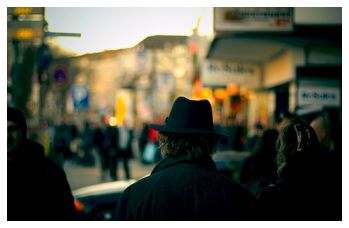

In [27]:
show_image(sample_image)

In [28]:
vgg16_sample_image = transform_image(sample_image)

In [29]:
VGG_16_prediction=vgg16(vgg16_sample_image)
VGG_16_prediction_numpy=VGG_16_prediction.cpu().detach().numpy()
predicted_class_max = np.argmax(VGG_16_prediction_numpy)
categories[predicted_class_max]                                               

'shopping basket'

In [30]:
def vgg16_predict(image_path, convert_to_path = False):
  if convert_to_path:
    image_path = f"{drive_path}data/flickr_8k_dataset/Images/{image_path}"
  image = transform_image(image_path)
  VGG_16_prediction=vgg16(image)
  VGG_16_prediction_numpy=VGG_16_prediction.cpu().detach().numpy()
  predicted_class_max = np.argmax(VGG_16_prediction_numpy)
  return categories[predicted_class_max]  

In [31]:
train_image_df["vgg16_pred"] = train_image_df["image"].apply(lambda img: vgg16_predict(img, convert_to_path = True))
test_image_df["vgg16_pred"] = test_image_df["image"].apply(lambda img: vgg16_predict(img, convert_to_path = True))

In [32]:
train_image_df

image  \
0     3293596075_973b0bfd08.jpg   
1     3623331945_df0f51d7dd.jpg   
2     3307667255_26bede91eb.jpg   
3     2943384009_c8cf749181.jpg   
4     2219959872_988e6d498e.jpg   
...                         ...   
6467  2518853257_02f30e282e.jpg   
6468   241346709_23204cc2bc.jpg   
6469  3375549004_beee810e60.jpg   
6470  3205839744_24504ba179.jpg   
6471  2679565682_91ecd283ff.jpg   

                                           yolov5_pred          vgg16_pred  
0                                                1 cat          schipperke  
1                                             3 person            sombrero  
2                                            23 person           Chihuahua  
3                                1 motorcycle 1 person         hand blower  
4                                             4 person            gas pump  
...                                                ...                 ...  
6467  2 person 2 chair 1 book 1 handbag 1 potted plant            tricycle  
6468                                          8 person           Chihuahua  
6469          9 person 1 cell phone 1 handbag 1 remote            sunglass  
6470                                             1 dog  Labrador retriever  
6471                                 2 person 1 remote          television  

[6472 rows x 3 columns]

In [33]:
test_image_df

image                               yolov5_pred  \
0     2624457062_89efc497a8.jpg                                  1 person   
1     1056249424_ef2a2e041c.jpg                        2 person 1 frisbee   
2     3265527323_6431f00692.jpg                             1 bird 1 bear   
3     3047264346_e24601bfbf.jpg                                  4 person   
4      241374292_11e3198daa.jpg                     21 person 1 car 1 tie   
...                         ...                                       ...   
1614  3564385317_1bf5094068.jpg                                  1 person   
1615   394161692_2576920777.jpg  7 person 1 dog 4 potted plant 3 umbrella   
1616  2551344688_17a12a6948.jpg                                  2 person   
1617   294549892_babb130543.jpg                       3 person 2 backpack   
1618   551403320_dfdcf9fc3b.jpg                                  1 person   

       vgg16_pred  
0          vacuum  
1          barrow  
2           llama  
3        sunglass  
4          barrow  
...           ...  
1614       barrow  
1615          bow  
1616  plastic bag  
1617       muzzle  
1618    accordion  

[1619 rows x 3 columns]

In [50]:
train_df = train_captions.merge(train_image_df, on="image")
train_df['seed_words'] = train_df['yolov5_pred'] + " " + train_df['vgg16_pred']
train_df

image  \
0      1000268201_693b08cb0e.jpg   
1      1000268201_693b08cb0e.jpg   
2      1000268201_693b08cb0e.jpg   
3      1000268201_693b08cb0e.jpg   
4      1000268201_693b08cb0e.jpg   
...                          ...   
32355   997722733_0cb5439472.jpg   
32356   997722733_0cb5439472.jpg   
32357   997722733_0cb5439472.jpg   
32358   997722733_0cb5439472.jpg   
32359   997722733_0cb5439472.jpg   

                                                 caption      yolov5_pred  \
0      A child in a pink dress is climbing up a set o...  1 person 1 vase   
1                  A girl going into a wooden building .  1 person 1 vase   
2       A little girl climbing into a wooden playhouse .  1 person 1 vase   
3      A little girl climbing the stairs to her playh...  1 person 1 vase   
4      A little girl in a pink dress going into a woo...  1 person 1 vase   
...                                                  ...              ...   
32355           A man in a pink shirt climbs a rock face  1 person 1 bear   
32356           A man is rock climbing high in the air .  1 person 1 bear   
32357  A person in a red shirt climbing up a rock fac...  1 person 1 bear   
32358                    A rock climber in a red shirt .  1 person 1 bear   
32359  A rock climber practices on a rock climbing wa...  1 person 1 bear   

       vgg16_pred                  seed_words  
0          ashcan      1 person 1 vase ashcan  
1          ashcan      1 person 1 vase ashcan  
2          ashcan      1 person 1 vase ashcan  
3          ashcan      1 person 1 vase ashcan  
4          ashcan      1 person 1 vase ashcan  
...           ...                         ...  
32355  paintbrush  1 person 1 bear paintbrush  
32356  paintbrush  1 person 1 bear paintbrush  
32357  paintbrush  1 person 1 bear paintbrush  
32358  paintbrush  1 person 1 bear paintbrush  
32359  paintbrush  1 person 1 bear paintbrush  

[32360 rows x 5 columns]

In [51]:
test_df = test_captions.merge(test_image_df, on="image")
test_df['seed_words'] = test_df['yolov5_pred'] + " " + test_df['vgg16_pred']
test_df

image  \
0     1002674143_1b742ab4b8.jpg   
1     1002674143_1b742ab4b8.jpg   
2     1002674143_1b742ab4b8.jpg   
3     1002674143_1b742ab4b8.jpg   
4     1002674143_1b742ab4b8.jpg   
...                         ...   
8090   990890291_afc72be141.jpg   
8091   990890291_afc72be141.jpg   
8092   990890291_afc72be141.jpg   
8093   990890291_afc72be141.jpg   
8094   990890291_afc72be141.jpg   

                                                caption         yolov5_pred  \
0     A little girl covered in paint sits in front o...     1 person 1 kite   
1     A little girl is sitting in front of a large p...     1 person 1 kite   
2     A small girl in the grass plays with fingerpai...     1 person 1 kite   
3     There is a girl with pigtails sitting in front...     1 person 1 kite   
4     Young girl with pigtails painting outside in t...     1 person 1 kite   
...                                                 ...                 ...   
8090  A man does a wheelie on his bicycle on the sid...  1 bicycle 4 person   
8091      A man is doing a wheelie on a mountain bike .  1 bicycle 4 person   
8092     A man on a bicycle is on only the back wheel .  1 bicycle 4 person   
8093  Asian man in orange hat is popping a wheelie o...  1 bicycle 4 person   
8094        Man on a bicycle riding on only one wheel .  1 bicycle 4 person   

          vgg16_pred                      seed_words  
0     Great Pyrenees  1 person 1 kite Great Pyrenees  
1     Great Pyrenees  1 person 1 kite Great Pyrenees  
2     Great Pyrenees  1 person 1 kite Great Pyrenees  
3     Great Pyrenees  1 person 1 kite Great Pyrenees  
4     Great Pyrenees  1 person 1 kite Great Pyrenees  
...              ...                             ...  
8090          barrow       1 bicycle 4 person barrow  
8091          barrow       1 bicycle 4 person barrow  
8092          barrow       1 bicycle 4 person barrow  
8093          barrow       1 bicycle 4 person barrow  
8094          barrow       1 bicycle 4 person barrow  

[8095 rows x 5 columns]

### Training Captions Pre-processing

#### Tokenisation

In [36]:
# control verbosity
transformers.logging.set_verbosity_error()
datasets.logging.set_verbosity_error()

# define support functions
def load_glove_vectors(filename = "glove.6B.300d.txt") -> Tuple[List[str], torch.Tensor]:
    """Load the GloVe vectors. See: `https://github.com/stanfordnlp/GloVe`"""
    path = Path(hf_hub_download(repo_id="stanfordnlp/glove", filename="glove.6B.zip"))
    target_file = path.parent / filename
    if not target_file.exists():
        with zipfile.ZipFile(path, 'r') as zip_ref:
            zip_ref.extractall(path.parent)

        if not target_file.exists():
            print(f"Available files:")
            for p in path.parent.iterdir():
                print(p)
            raise ValueError(f"Target file `{target_file.name}` can't be found. Check if `{filename}` was properly downloaded.")

    # parse the vocabulary and the vectors
    vocabulary = []
    vectors = []
    with open(target_file, "r") as f:
        for l in tqdm(f.readlines(), desc=f"Parsing {target_file.name}..." ):
            word, *vector = l.split()
            vocabulary.append(word)
            vectors.append(torch.tensor([float(v) for v in vector]))
    vectors = torch.stack(vectors)
    return vocabulary, vectors

In [37]:
# prepare data for the later cells
glove_vocabulary, glove_vectors = load_glove_vectors()
rich.print(f"glove_vocabulary: type={type(glove_vocabulary)}, length={len(glove_vocabulary)}")
rich.print(f"glove_vectors: type={type(glove_vectors)}, shape={glove_vectors.shape}, dtype={glove_vectors.dtype}")

# add special tokens
special_tokens = ['<|start|>', '<|unknown|>', '<|pad|>']
glove_vocabulary = special_tokens + glove_vocabulary
glove_vectors = torch.cat([torch.randn_like(glove_vectors[:len(special_tokens)]), glove_vectors])

# tokenizer for GloVe
glove_tokenizer = tokenizers.Tokenizer(tokenizers.models.WordLevel(vocab={v:i for i,v in enumerate(glove_vocabulary)}, unk_token="<|unknown|>"))
glove_tokenizer.normalizer = tokenizers.normalizers.BertNormalizer(strip_accents=False)
glove_tokenizer.pre_tokenizer = tokenizers.pre_tokenizers.Whitespace()

Downloading:   0%|          | 0.00/862M [00:00<?, ?B/s]

Parsing glove.6B.300d.txt...:   0%|          | 0/400001 [00:00<?, ?it/s]

glove_vocabulary: type=<class 'list'>, length=400001

glove_vectors: type=<class 'torch.Tensor'>, shape=torch.Size([400001, 300]), dtype=torch.float32

In [52]:
train_dataset = Dataset.from_dict(train_df)
test_dataset = Dataset.from_dict(test_df)
dataset_dict = datasets.DatasetDict({"train":train_dataset,"test":test_dataset})
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['image', 'caption', 'yolov5_pred', 'vgg16_pred', 'seed_words'],
        num_rows: 32360
    })
    test: Dataset({
        features: ['image', 'caption', 'yolov5_pred', 'vgg16_pred', 'seed_words'],
        num_rows: 8095
    })
})

In [66]:
max_dataset_size = dataset_dict["train"].shape[0] 
max_seq_size = 10 # and very short sequences

# load and tokenizer the dataset
def batch_tokenize(batch: List[Dict[str, Any]], max_length=max_seq_size, tokenizer: tokenizers.Tokenizer = None) -> torch.Tensor:
    seed_words = batch["seed_words"]
    seed_words_encodings = tokenizer.encode_batch(seed_words)

    captions = batch["caption"]
    caption_encoding = tokenizer.encode_batch(captions)

    return {
        "seed_words_token_ids": [x.ids[:max_length] for x in seed_words_encodings],
        "captions_token_ids": [x.ids[:max_length] for x in caption_encoding],  
        }

# load AG News, take a subset of `max_dataset_size` rows and tokenize
# dataset = datasets.load_dataset("ag_news")
train_dataset = Dataset.from_dict(train_df)
test_dataset = Dataset.from_dict(test_df)
dataset_dict = datasets.DatasetDict({"train":train_dataset,"test":test_dataset})

dataset = datasets.DatasetDict({split: dset.select(range(max_dataset_size)) if len(dset) > max_dataset_size else dset for split, dset in dataset_dict.items()})
dataset = dataset.map(partial(batch_tokenize, tokenizer=glove_tokenizer), batched=True, num_proc=2, batch_size=10)
rich.print(dataset)

#0:   0%|          | 0/1618 [00:00<?, ?ba/s]

#1:   0%|          | 0/1618 [00:00<?, ?ba/s]

#0:   0%|          | 0/405 [00:00<?, ?ba/s]

#1:   0%|          | 0/405 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'caption', 'yolov5_pred', 'vgg16_pred', 'seed_words', 'seed_words_token_ids', 
'captions_token_ids'],
        num_rows: 32360
    })
    test: Dataset({
        features: ['image', 'caption', 'yolov5_pred', 'vgg16_pred', 'seed_words', 'seed_words_token_ids', 
'captions_token_ids'],
        num_rows: 8095
    })
})